In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('survey.csv')
questions = df.columns
print(questions)

Index(['Tidsmerke', 'Omtrent hvor mange rundballer bruker gården i året?',
       'Ca. hvor mange lag plast er det på hver rundball?',
       'Presser du egne rundballer eller kjøper du tjenesten (dvs. kjøpe pressing, pakking og plast som en pakke)?',
       'Hvis du presser egne, hvor mye betaler du (ca) for plasten i året?',
       'Hvis du kjøper pressing, pakking og plast, hvor mye betaler du (ca) for dette i året?',
       'Alder', 'Opplever du utfordringer med oppbevaring av plast?',
       'Hvor oppbevarer du plasten? (Innendørs, utendørs, under tak, i container osv.)',
       'Bruker du en form for presse til å komprimere plasten?',
       'Kommentar (For eksempel hva slags presse, vil det gjøre renhold enklere, løse plassproblemer osv., tanker om pris):',
       'Hvordan rengjør du plasten før den leveres/hentes?',
       'Utfordringer knyttet til dette?',
       'Hender det at du lar plasten ligge igjen på jordet? I så fall, hvorfor?',
       'Hvordan hentes/leveres plasten t

# 1: Omtrent hvor mange rundballer bruker gården i året?

Her ha noen svart "250 tørre" som har blit gjort om til "250".

<AxesSubplot:>

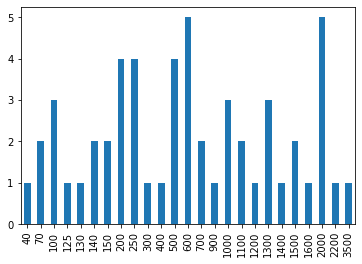

In [23]:
# kanskje gjør om til intervaller? 
df[questions[1]].value_counts().sort_index().plot(kind='bar')

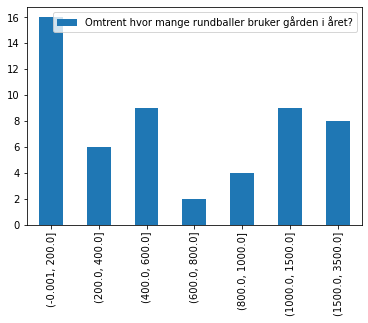

In [24]:
out = pd.cut(df[questions[1]], bins=[0, 200, 400, 600, 800, 1000, 1500, 3500], include_lowest=True)
out.value_counts(sort=False).plot(kind='bar').legend(loc=0)



# 2: Ca. hvor mange lage plast er det på hver rundball?

Verdier som ligger langt uten for rimelighentes grenser (feks. 690 lag) er fjernet.
Noen har svart med intervaller, feks 10-12, som har har blit gjort om til gjennomsnittet 10-12=11. 
En person svart "8 lag" -> "8"

<AxesSubplot:>

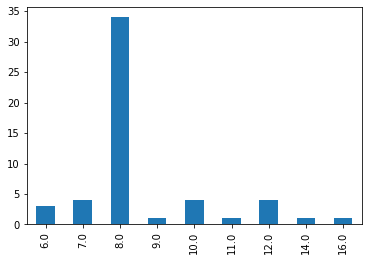

In [25]:
df[questions[2]].value_counts().sort_index().plot(kind='bar')

# 3: Presser du egne rundballer eller kjøper du tjenesten (dvs. kjøpe pressing, pakking og plast som en pakke)?
Ingenting som måtte endres på

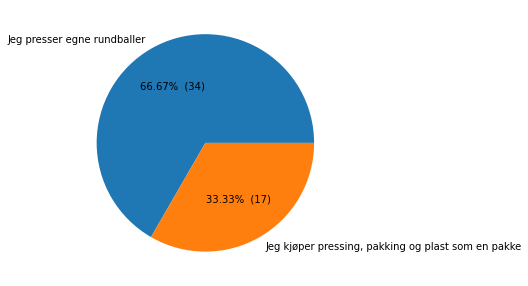

In [26]:

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
    
#pie = df[questions[3]].value_counts().plot.pie(figsize=(5,5), ylabel="", autopct='%.2f')
pie = df[questions[3]].value_counts().plot.pie(figsize=(5,5), ylabel="", autopct=make_autopct(df[questions[3]].value_counts()))


# 4: Hvis du presser egne, hvor mye betaler du (ca) for plasten i året? 
To har svart "Mellom kr 6000- 8000" -> 7000
En har svart "Ca kr 45 pr ball", vedkommende har også svart på #1 (antall rundballer i året) som er 300 rundballer i året, som gir 45 * 300 = 13 500 kr
En har svart "40lapper". Antar at lapper betyr 1000 kr -> 40 000 kr. 
En annen har svart "ca 840 pr rull i år" som ikke lar seg tolkes så svaret er dermed fjernet. 


<AxesSubplot:>

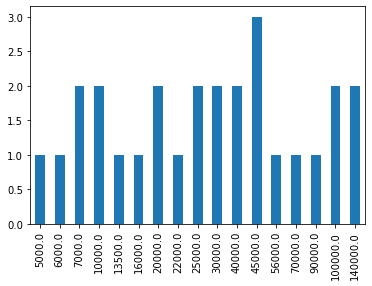

In [27]:
df[questions[4]].value_counts().sort_index().plot(kind='bar')


# 5: Hvis du kjøper pressing, pakking og plast, hvor mye betaler du (ca) for dette i året?
En har svart "200 ,- pr stk + mva", vedkommende har også svart på # 1 (1400), som gir 200 * 1400 = 280 000 kr
En annen har svart "200 per ball" og svart # 1 (140), som gir 200 * 140 = 28 000kr

<AxesSubplot:>

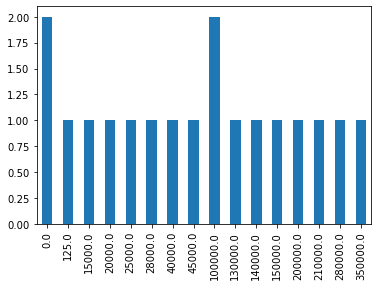

In [28]:
df[questions[5]].value_counts().sort_index().plot(kind="bar")

# 6: Alder
Ingenting å endre på

<AxesSubplot:ylabel='Alder'>

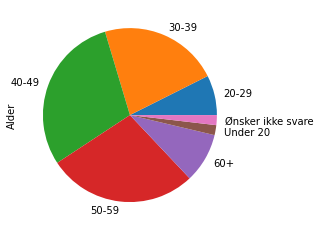

In [29]:
df[questions[6]].value_counts().sort_index().plot(kind="pie")

# Inndeling: Utfordringer knyttet til resirkulering av rundballeplast


# 7: Opplever du utfordringer med oppbevaring av plast?
Inteingt å endre på. 

<AxesSubplot:>

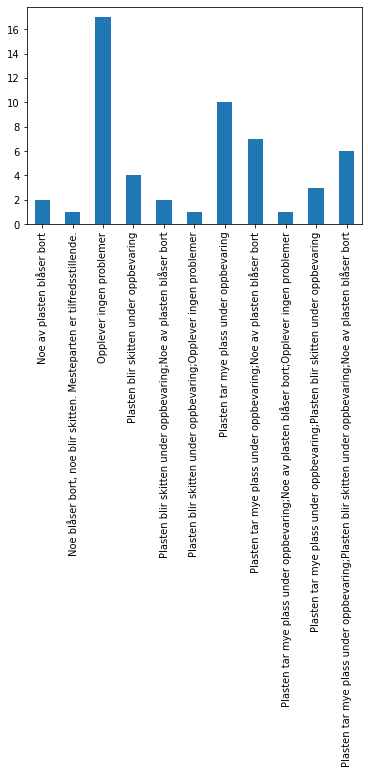

In [30]:
# Fikse denne....
df[questions[7]].value_counts().sort_index().plot(kind="bar")

# 8: Hvor oppbevarer du plasten? (Innendørs, utendørs, under tak, i container osv.)
Flere svart "ute" -> Utendørs og "inne" -> "Innendørs" 

"Utendørs ved siden av rundballelageret." -> "Utendørs"

"Under tak i en carport" -> Carport

"Inne på låven" -> "Innendørs"

"Både ute og inne allt etter hvor de er når de strippes" -> "Innendørs;Utendørs"

"I vedsekker, noe innendørs noe utendørs" -> "Innendørs;Utendørs;Vedsekk"

"Ute underlåvebrua og snø" -> "Utendørs"

"I forsentral innendørs" -> "Innendørs"

"Eg legger plasten i vedsekk i ein ibc dunk." -> "Vedsekk;Container"

"Bruker vedkorg for storsekk" -> "Vedkorg"

"Pakker inne buntes sammen lagres ute" -> "Utendørs"

"Under tak til det er fult inne da blir det flyttet ut i container" -> "Innendørs;Container"

"På pakker ute etter at den er presset" -> "Utendørs"

"container som blir tømt av renovasjonsselskap når den er full" -> "Container"

"Utendørs, ved fjøsveggen i ly for vinden, stort sett" -> "Utendørs"

"Utendørs, i 1500 liters vedsekk" -> "Utendørs;Vedsekk"

"Ute,men i container" -> "Container"

"Blir presset i firkantballer og blir lagret ute. Så lenge dei er presset og buntet sammen med tau så fungerer det godt." -> "Utendørs"

"Oppsamling innandørs, oppbevaring for avhenting på skjerma plass ute" -> "Utendørs"

"Utendørs container" -> "Container"

<AxesSubplot:>

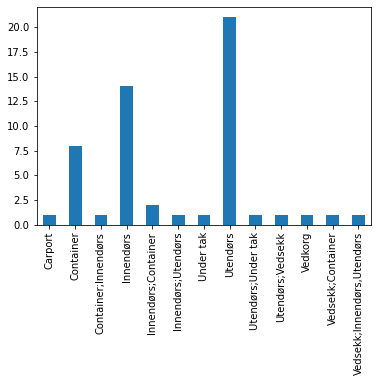

In [31]:
df[questions[8]].value_counts().sort_index().plot(kind="bar")

# 9: Bruker du en form for presse til å komprimere plasten?


<AxesSubplot:ylabel='Bruker du en form for presse til å komprimere plasten?'>

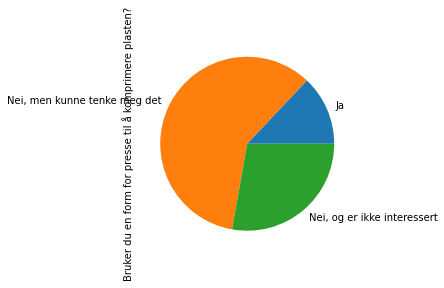

In [32]:
df[questions[9]].value_counts().sort_index().plot(kind="pie")

# 10: Kommentar (For eksempel hva slags presse, vil det gjøre renhold enklere, løse plassproblemer osv., tanker om pris):


In [33]:
df[questions[10]].dropna()


0                                           Papp presse
3     Prisen bør ikke overstige ca. 30000 kr hvis de...
5     Ei presse hvor en kan bruke traktorens hydraul...
7             Gammel rundballepresse eller kommprimator
8     Vil bli enklere å transportere til mottak. Vil...
9     Pris er avgjørende på pressa men plasten har b...
14                      Hopper selv plasten i vedsekker
15            Løser plassproblemer og lettere å levere.
16    Komprimerer med traktor, leverer et lass som k...
18            Ønsker presse, alt for dyrt å investere i
19                                             Vet ikke
22                                   Lik ei papirpresse
23    Må være billig, gjerne sånn som også kan press...
25                          Komprimator til billig pris
26    Liten presse til under 10 tusen, for oss som d...
27    Ein enkel papp/plast komprimator vil gjøre pla...
28    Koster for mye, ingen plass å ha presse innendørs
29                              Enkel emballasje

# 11: Hvordan rengjør du plasten før den leveres/hentes?

<AxesSubplot:>

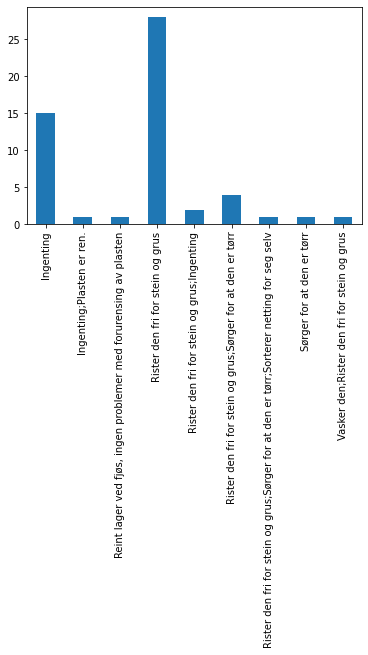

In [34]:
df[questions[11]].value_counts().sort_index().plot(kind="bar")

# 12: Utfordringer knyttet til dette?

In [35]:
df[questions[12]].dropna()

3     Enkelt når det brukes bredplast i stedet for n...
5                            Blir med en del is og snø.
7     Plasten tar mye plass og bør ikke lagres direk...
8     Det vil alltid sitte igjen små mengder forrest...
14                                                  Nei
15    Noe fôrrester kan ligge mellom laga med plast....
16                                                Ingen
19                                                  Nei
22                                                  Nei
23                                                  Nei
26                        Ingen returordning i kommunen
28     is tiner seint, så det må taes over flere runder
32                                                Ingen
33                                           Mye arbeid
35                                Ikke all dritt går av
36                       Blir veldig bløtt rundt pressa
37    Innerfolien er vanskelegare å få rein enn sjøl...
40                     Tidkrevende og vaske all 

# 13: Hender det at du lar plasten ligge igjen på jordet? I så fall, hvorfor?

"Hender ikke" -> "Nei"

"Aldri" -> "Nei"

I Google Forms blir svarene presentert i en bar chart, men tenker at det er mer praktisk å vise fram svarene til de som ikke har svart "Nei".

In [73]:
df[questions[13]].dropna()
# PRøv å velg kun de som ikke har nei


0                                                   Nei
1                                                   Nei
2                                                   Nei
3                                                   Nei
4                                                   Nei
5                                                   Nei
7                                                   Nei
8                                                   Nei
9                                                   Nei
10                                                  Nei
14                                                  Nei
15                    Noen ender kan være frosset fast.
16                                                  Nei
17                                                  Nei
18    Om det fryser fast/ snør ned. Runder hvor vi p...
19                                                  Nei
20                                                  Nei
22                                              

# 14: Hvordan hentes/leveres plasten til gjenvinning?

<AxesSubplot:ylabel='Bruker du en form for presse til å komprimere plasten?'>

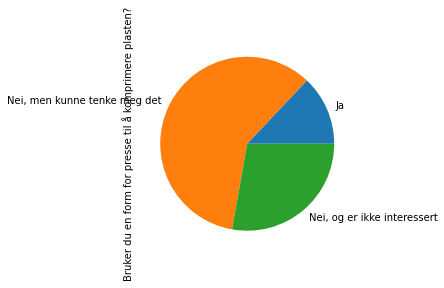

In [74]:
df[questions[9]].value_counts().sort_index().plot(kind="pie")

# 15: Fungerer henting/levering av plast greit?

<AxesSubplot:>

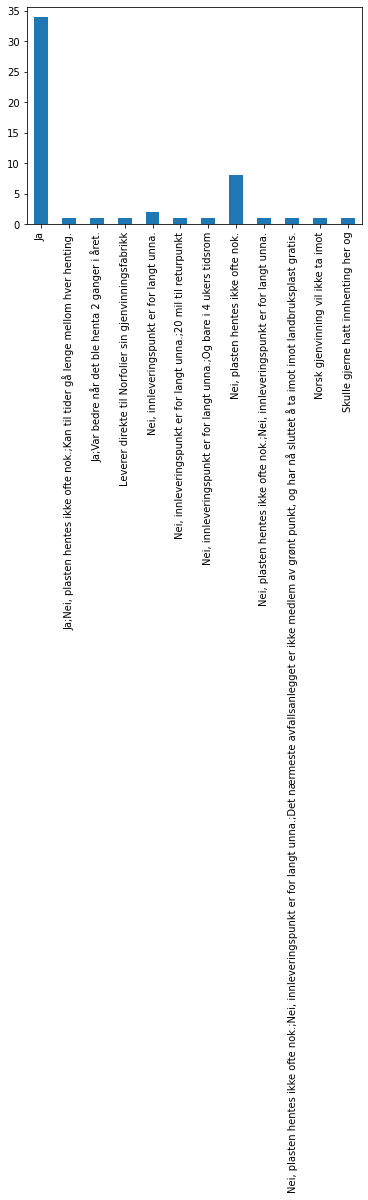

In [76]:
df[questions[15]].value_counts().sort_index().plot(kind="bar")

# Inndeling: Pilotprosjekt - resirkulering av landbruksplast

# 16: Hva mener du om en slik ordning? (som beskrevet øverst)

In [78]:
df[questions[16]].dropna()


0              Greit de men må da hentes i løpet av mai
2                                                  Lurt
3                              Det høres interessant ut
4                                               Positiv
5                                                   Bra
6     Ordningen høres veldig bra ut, håper flere vil...
7     Kunne vært interessant hvis plasten blir hente...
8     Blir da avhengig av å kjøpe plast fra de?! Ikk...
9                                                   Bra
10                                             Vet ikke
13    Er nok for langt unna til at det lønner seg sa...
14                                          Interessant
15                                          Godt tiltak
16    Har allerede en gjennvinningsgrad på tilnærmet...
18    Om det hentes ofte nok, rengjøring av plasten ...
19                                                Flott
20                                 Det kan være aktuelt
22                     Høres i utgangspunktet gr

# 17:  Hvor stor andel av kjøpesummen av plasten må minst refunderes for at dette prosjektet er interessant?

<AxesSubplot:ylabel='Hvor stor andel av kjøpesummen av plasten må minst refunderes for at dette prosjektet er interessant?'>

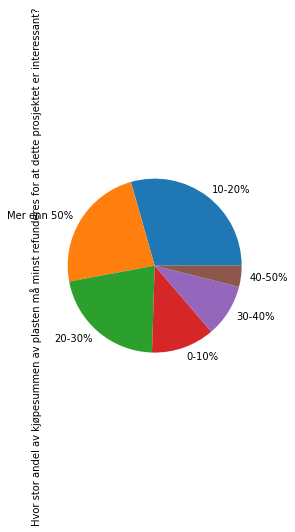

In [79]:
df[questions[17]].dropna().value_counts().plot(kind="pie")

# 18: Hva er den viktigste motivasjonen for deg?

<AxesSubplot:ylabel='Hva er den viktigste motivasjonen for deg?'>

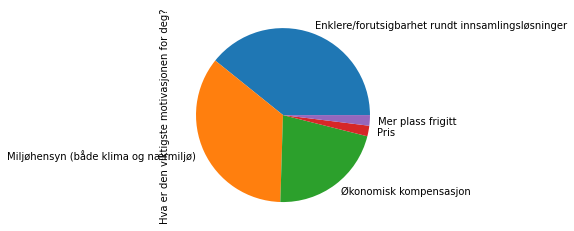

In [80]:
df[questions[18]].dropna().value_counts().plot(kind="pie")

# 19: Vil du være villig til binde deg til én leverandør av plast og utstyr for en periode?

<AxesSubplot:ylabel='Vil du være villig til binde deg til én leverandør av plast og utstyr for en periode?'>

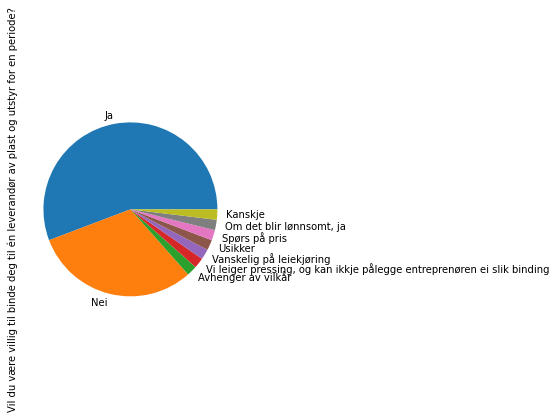

In [81]:
df[questions[19]].dropna().value_counts().plot(kind="pie")

# 20: Er det interessant om en enkel plastpresse inngår i avtalen med Orkel?

<AxesSubplot:>

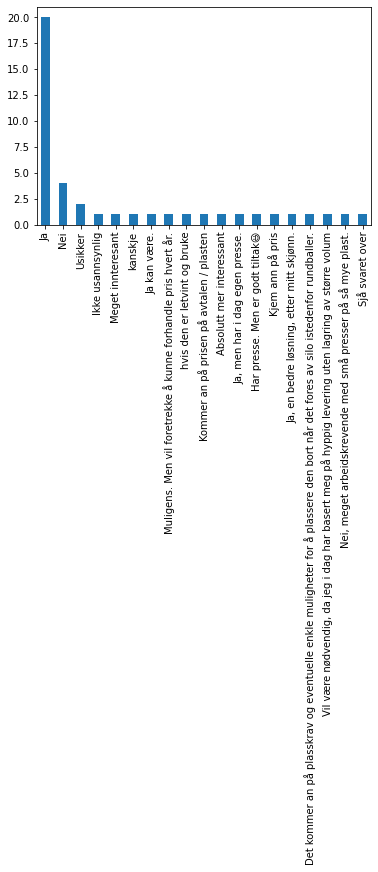

In [82]:
df[questions[20]].dropna().value_counts().plot(kind="bar")

# Inndeling: Takk for din deltagelse!

# 21: Har du noen andre kommentarer?

In [84]:
df[questions[21]].dropna()


2     Hvis et slikt opplegg gjør plastkostnadene rim...
5     Det kler beste, og mest miljøvennlige vil være...
7     Har hatt en brukbar ordning med innsamling av ...
26                      Håper det kommer gode løsninger
33    Se på comprimatorer med store inkastningsrom, ...
43    Tenker det er viktig med gode løsninger på opp...
46               Bra det settes fokus på rundballeplast
47                                      Flott prosjekt.
52    For at dette skal være interessant må det bidr...
Name: Har du noen andre kommentarer:, dtype: object